<a href="https://colab.research.google.com/github/siddhartha237/MLT-Workshop/blob/main/(4)_Sampling_and_Visualisation_Bar%2C_Histogram%2C_Scatter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sampling from Distributions, Bar Plots, Histograms and Scatter plots

## Import and Settings

We will import `NumPy` and `matplotlib`. In addition, we will also start with some customised layout for the plot.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Sampling and Plotting

`NumPy` provides a utility to generate pseudo-random numbers. We shall try to sample points from various distributions. Once we have a sample, we can then represent it pictorially using suitable plots.

In [ ]:
rng = np.random.default_rng(seed = 42)

### Sampling: Bernoulli

Let us generate a sample of $1000$ points from the $\text{Br}(0.7)$.

In `NumPy`:

In [ ]:
X = rng.choice([0, 1], p = [0.3, 0.7], size = 1000)
X.shape

(1000,)

### Plotting: Bar plot

Let us visualise the sample using a bar plot. For this, we first need the height of the bars. For now, use the method given below. This will become clear in subsequent colabs.

In [ ]:
zeros = ones = 0
for i in range(X.shape[0]):
    if X[i] == 1:
        ones += 1
    else:
        zeros += 1
zeros, ones

(290, 710)

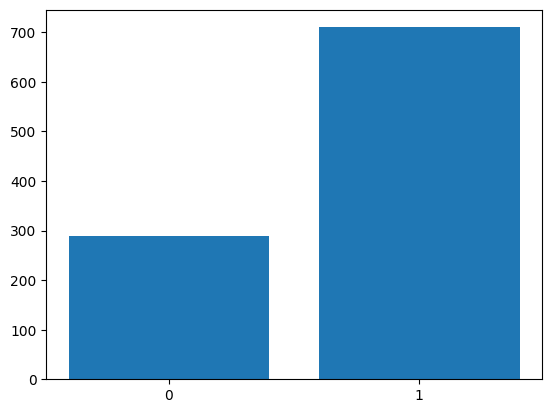

In [ ]:
plt.bar([0, 1], [zeros, ones])
plt.xticks([0, 1]);

### Sampling: Gaussian

We now generate a sample of $10,000$ points from $\mathcal{N}(1, 4)$. Recall that $\mu = 1$ and $\sigma^2 = 4$.

In [ ]:
X = rng.normal(1, 2, size = 10_000)
X.shape

(10000,)

### Plotting: Histogram

We can now visualise the sample using a histogram.

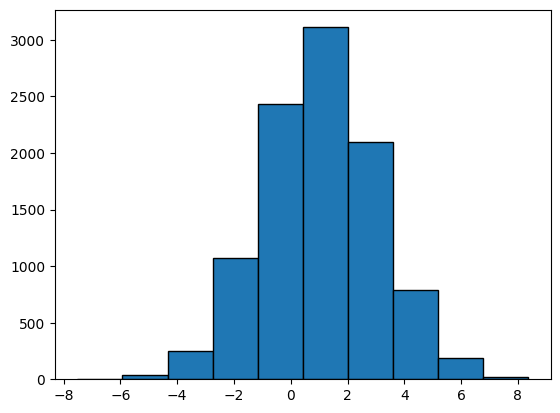

In [ ]:
plt.hist(X, bins = 10, edgecolor = 'black');

### Sampling: Bivariate Gaussian

Sample 1000 points from the following Bivariate Gaussian:

$$
\mathcal{N} \left( \begin{bmatrix}1 \\ 2\end{bmatrix}, \begin{bmatrix}1 & 0\\0 & 5\end{bmatrix} \right)
$$

In [ ]:
# bi-variate normal
mu = np.array([1, 2])
cov = np.array([
    [1, 0],
    [0, 5]
])
X = rng.multivariate_normal(mu, cov, size = 1000).T
X.shape # d x n

(2, 1000)

### Plotting: Scatter plot

Visualise the sample using a scatter plot. Try to zoom out of the plot and see what the shape of the distribution looks like. Change the values of the covariance matrix and observe how the shape changes.

(-2.67695982581525, 5.708057910439911, -5.568402511330789, 8.870745335523443)

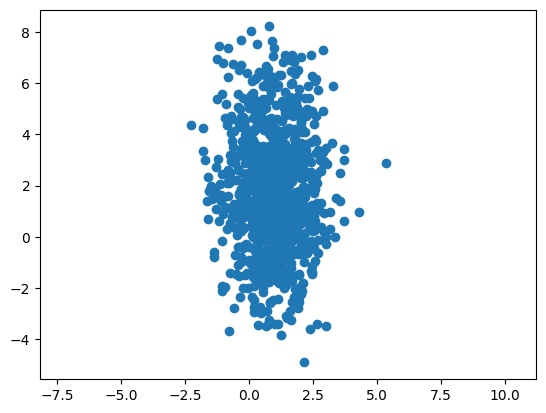

In [ ]:
plt.scatter(X[0, :], X[1, :])
plt.axis('equal');

### Estimating the sample covariance matrix

Estimate the sample covaraince matrix using the above data. See how close it is to the population covariance matrix.


$$
C = \cfrac{1}{n} \sum (x_i - \mu_i) (x_i - \mu_i)^T
$$

In [ ]:
# Center the dataset
# mean
mu = X.mean(axis = 1) # mean along the columns
# mean subtraction
X = X - mu.reshape(2, 1)
X.mean(axis = 1)

array([-2.30371278e-17, -4.56301663e-17])

In [ ]:
# Sample covariance
d, n = X.shape
C = X @ X.T / n
C

array([[ 1.0211785 , -0.08677038],
       [-0.08677038,  5.25780768]])

In [ ]:
np.linalg.norm(C - cov)

0.2863066973935711

## GMM

Draw $1,000,000$ samples from a Gaussian Mixture Model (GMM) that has three components, with mixture probabilities $[0.2, 0.3, 0.5]$ and means $[-10, 0, 10]$. The standard deviation of all three Gaussians is the same and is equal to $1$. Visualise the samples using a histogram.

In [ ]:
# First choose the component
# Generate a point from the chosen component

In [ ]:
# Step-1
n = 1_000_000
comp = rng.choice([0, 1, 2], p = [0.2, 0.3, 0.5], size = n)

In [ ]:
# Step-2
mu = [0, 3, 5]
X = np.zeros(n)
for i, c in enumerate(comp):
    X[i] = rng.normal(mu[c], 1)
X.shape

(1000000,)

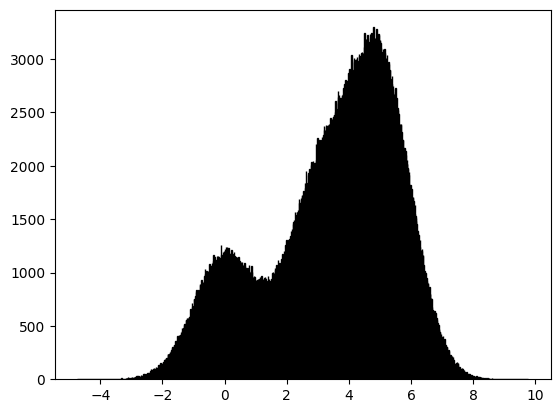

In [ ]:
plt.hist(X, edgecolor = 'black', bins = 1000);